# Exploratory Data Analysis

## 1. Import Libraries and Load Data:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
df = pd.read_csv('online_shoppers_intention.csv')

## 2. Data Inspection:

In [12]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

1. Dataset size: The dataset contains 12,330 rows.
2. Data types: The data types present are integers, floating-point numbers, strings, and booleans.
3. Data integrity: There are no notable issues with the data types or columns, and they are all appropriate.
Missing values: No columns contain empty or missing values.

In [8]:
df.shape

(12330, 18)

In [9]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## 3. Data Cleaning and Preprocessing:

In [12]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(125)

In [19]:
# Upon examining the 'Month' column, it was observed that most months are abbreviated (e.g., JUL, AUG, DEC), but one entry uses 'June' instead of 'Jun'. 
# To maintain consistency, this will be corrected.
df.loc[df['Month'] == 'June', 'Month'] = 'Jun'

#There is an absence of data for January and April. These months will be excluded from the analysis for consistency.
month_order = ['Feb', 'Mar', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

## 4. Statistical Summary

In [112]:
# column classification based on data type
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Revenue']
cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
df[nums] = df[nums].round(1)

In [27]:
df_cats = df[cats].astype('category').copy()

In [28]:
df_cats.describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [29]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818662,0.503569,34.472482,31.731468,1194.746602,0.016642,0.029765,5.889416,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779240,1.270156,140.749220,44.475503,1913.669359,0.050807,0.058917,18.568865,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.125000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.950000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.250000,0.000000,0.000000,38.000000,1464.150000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.800000,24.000000,2549.400000,705.000000,63973.500000,0.200000,0.200000,361.800000,1.000000,8.000000,13.000000,9.000000,20.000000


## 5. Value Counting

In [30]:
for col in cats: 
    print(f'''Value count in column {col}:''')
    print(df[col].value_counts())
    print()

Value count in column Month:
Month
May    3364
Nov    2998
Mar    1907
Dec    1727
Oct     549
Sep     448
Aug     433
Jul     432
Jun     288
Feb     184
Name: count, dtype: int64

Value count in column OperatingSystems:
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

Value count in column Browser:
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

Value count in column Region:
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

Value count in column TrafficType:
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int6

## 6. Univariate Analysis

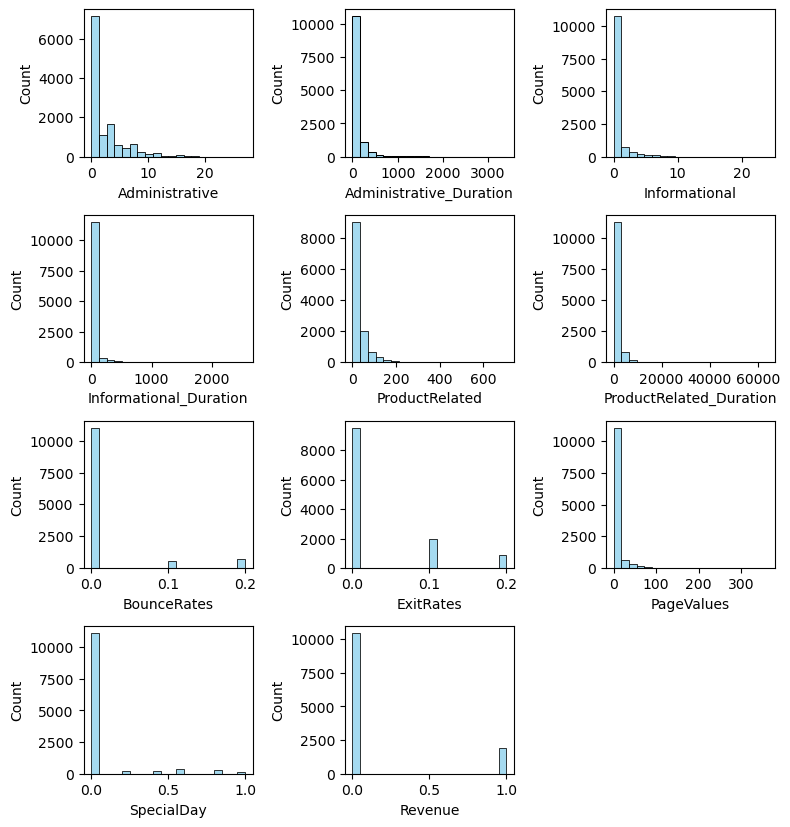

In [113]:
# Hist plot (Numerical)
features = nums
plt.figure(figsize=(8, 10))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', bins = 20)
    plt.tight_layout()

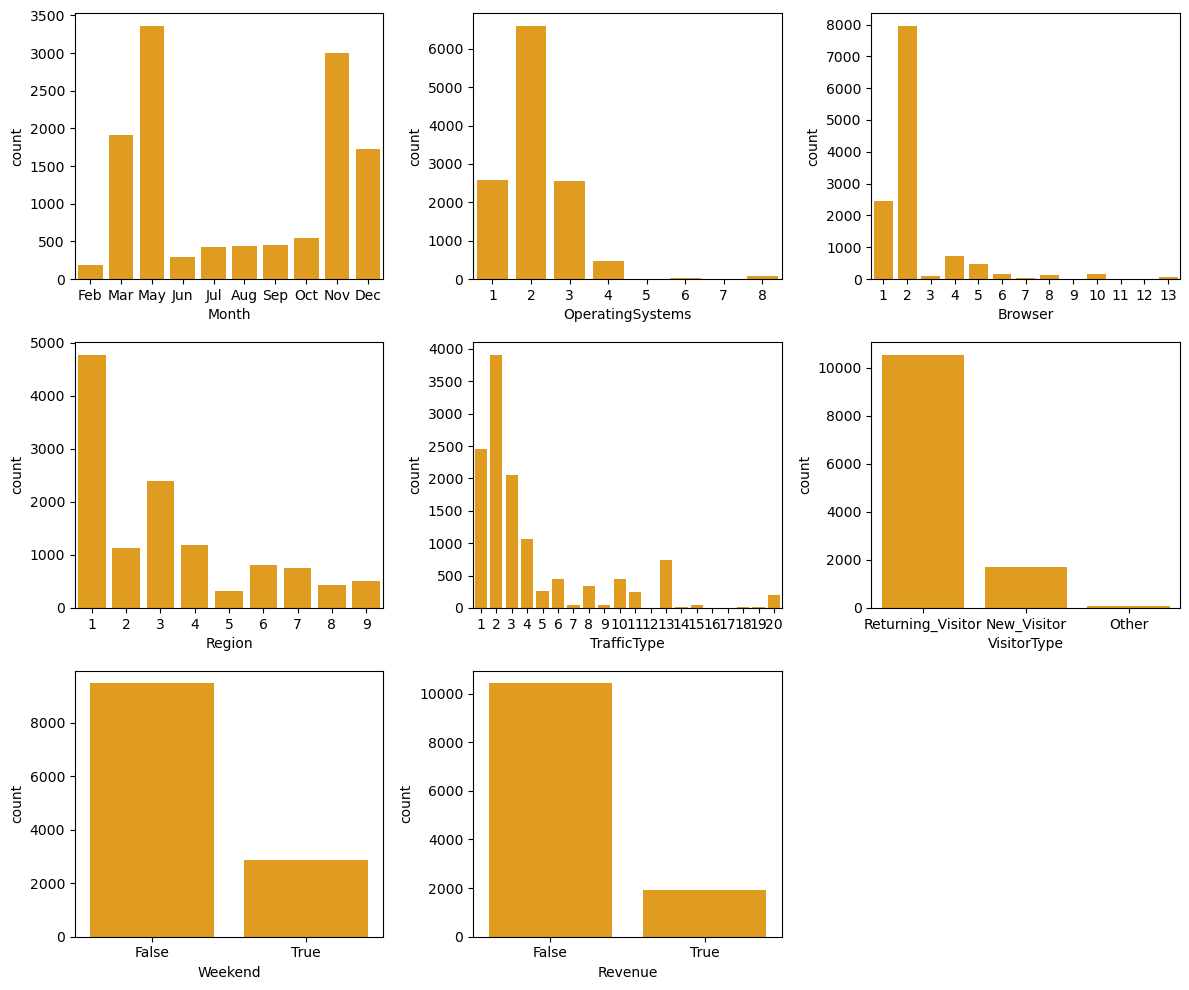

In [42]:
# Hist plot (categorical)
plt.figure(figsize=(12, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], color='orange', orient='v')
    plt.tight_layout()

1. Customers are more active in month of may and november.
2. A significant majority of sessions use OS type 2 and Browser type 2.
3. Region 1 accounts for the majority of visitor sessions.
4. Traffic Type 2 dominates session sources.
5. Returning customers are more than new customers or other category.
6. Session activity on non-weekend days are more compared to weekends.
7. Major session activity is not converted into final purchase. 

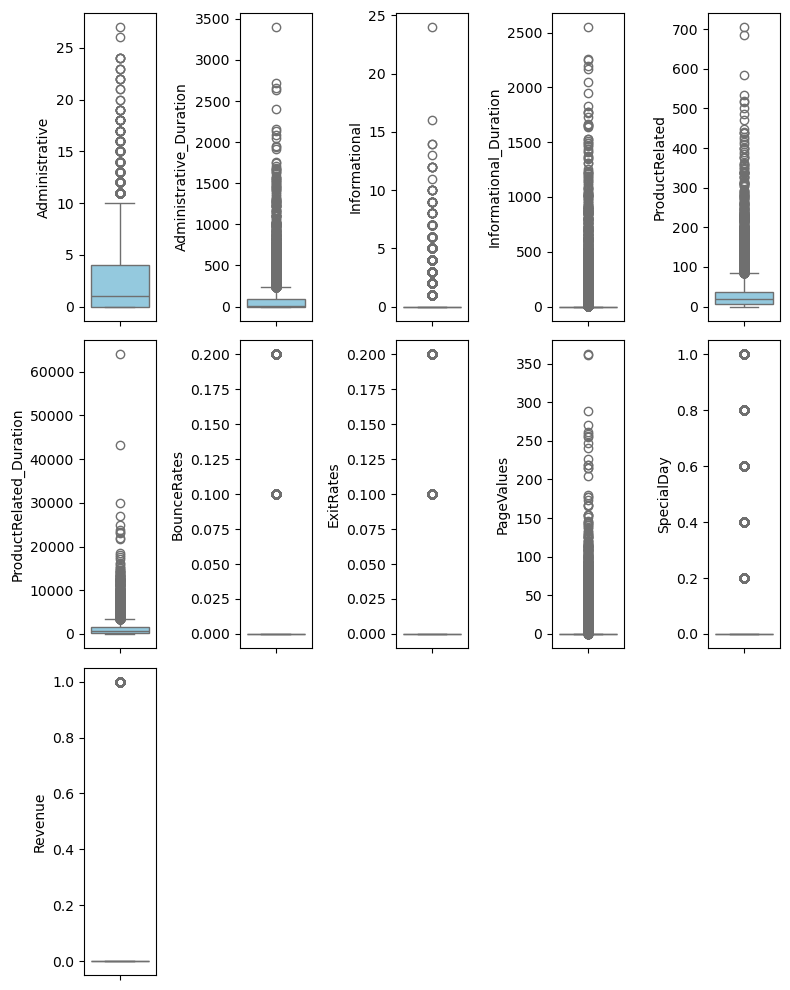

In [114]:
# Box Plot for Features
features = nums
plt.figure(figsize=(8, 10))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='skyblue', orient='v')
    plt.tight_layout()

## 7. Bivariate Analysis

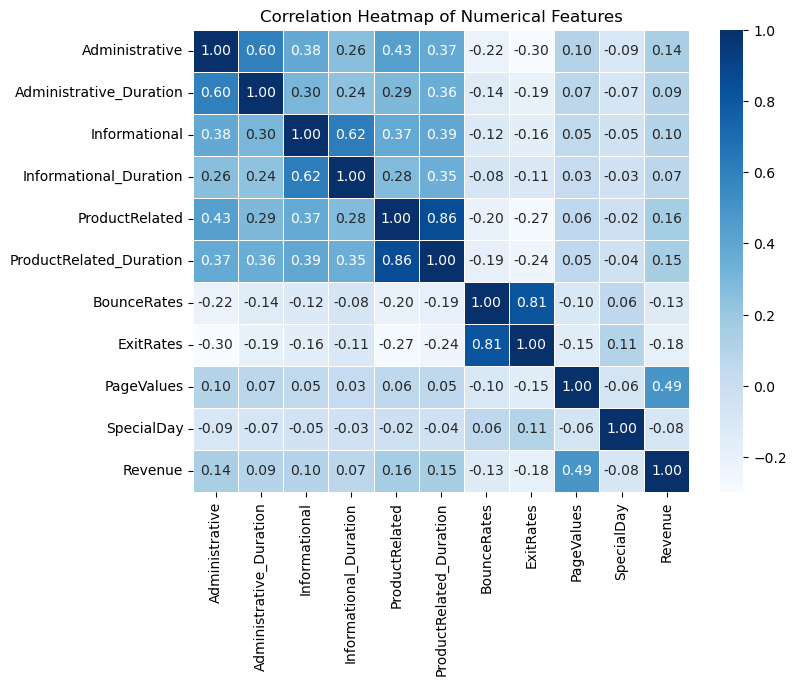

In [115]:
# Correlation heatmap
correlation_matrix = df[nums].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    cbar=True,
    linewidths=.5
)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Insights: 
1. There is a high correlation(0.49) with page values and revenue.
2. Bounces rates got negative influence on revenue.
3. Pages which has high bounce rates tends to have high exit rates as well (correlation of exit rates and bounce rate is high).
4. The website earns a lot of revenue from product related pages.

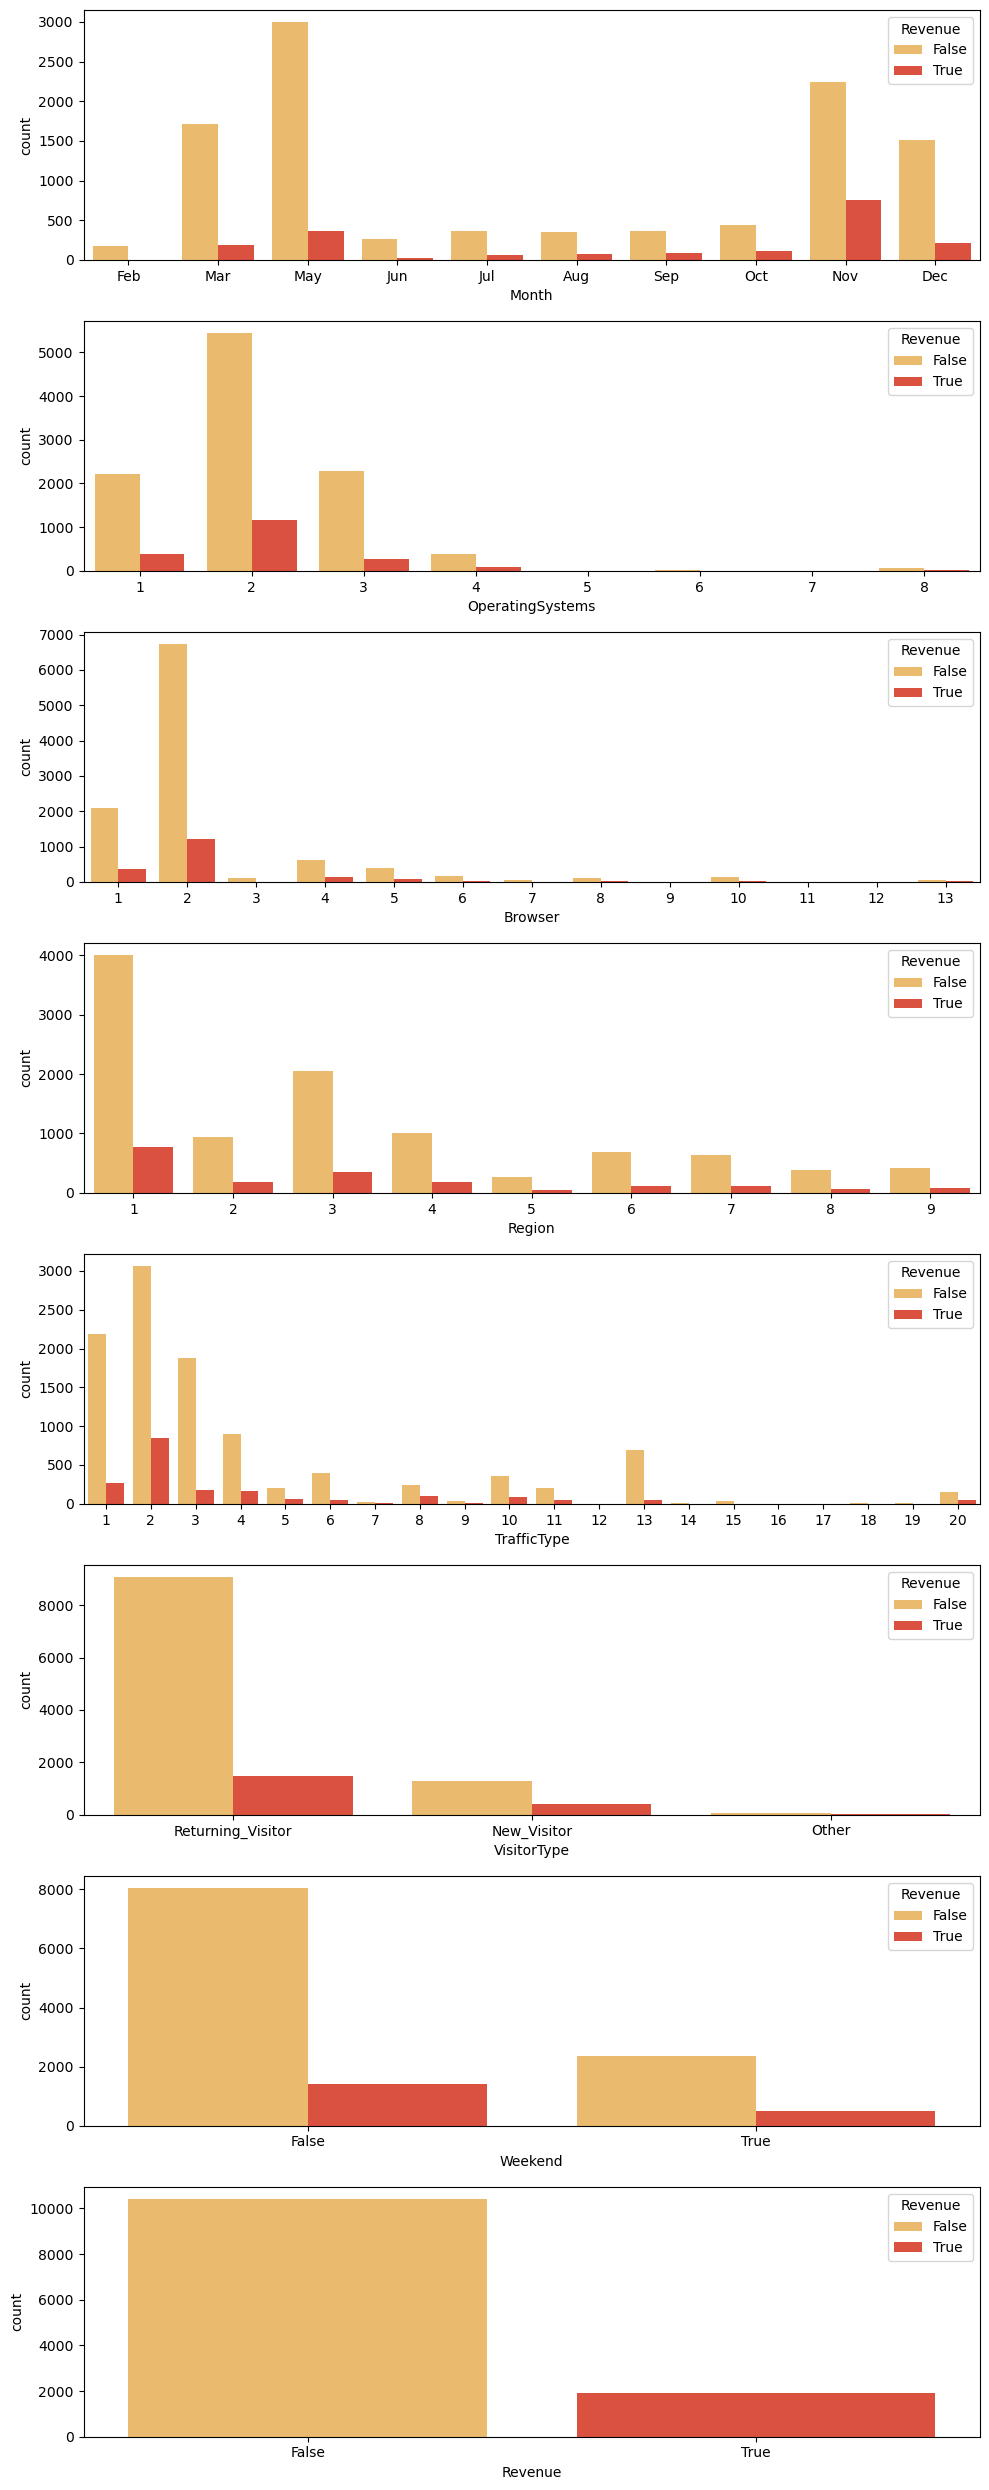

In [38]:
features = cats
plt.figure(figsize = (10,25))
for i in range (0, len(features)):
    plt.subplot(8, 1, i+1)
    sns.countplot(x=features[i], data=df,  palette="YlOrRd", hue="Revenue")
    plt.tight_layout()



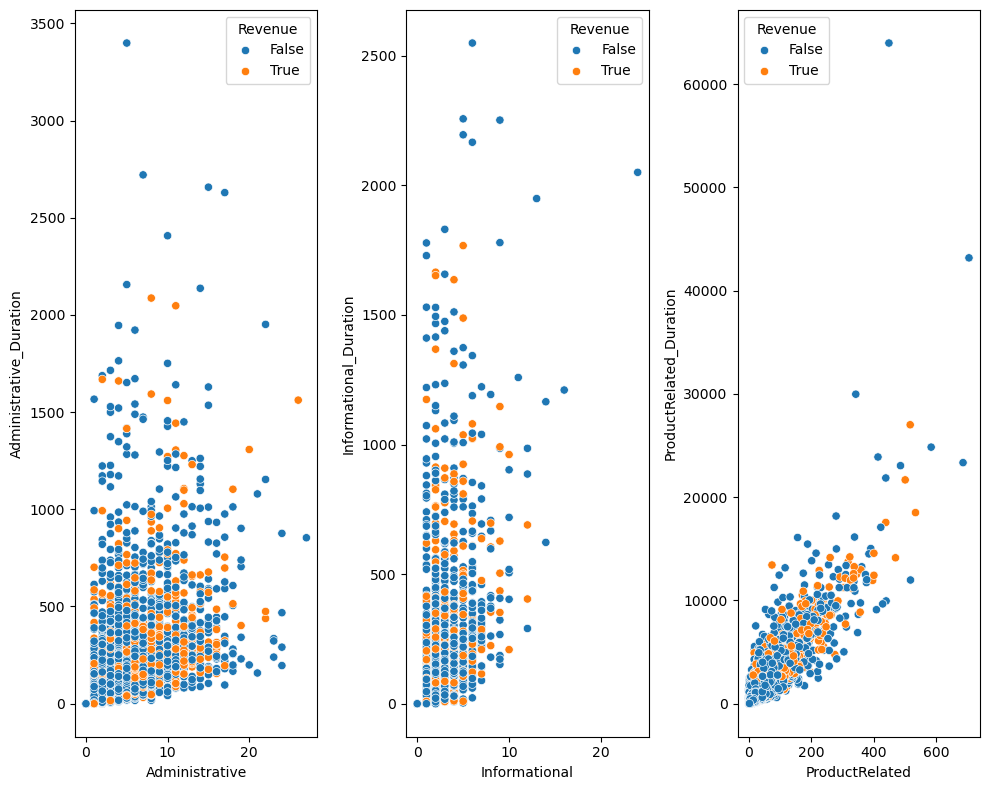

In [108]:
# Duration of pages VS Revenue

plt.figure(figsize = (10,8))
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data = df)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data = df)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data = df)
plt.tight_layout()


1. Administrative pages: Users spend 0-15 secs on this type of pages which is very low. A major customers spend average duration here might suggest a complex or poorly designed interface.
2. Informational pages : Users spend up to 10 seconds on this pages. This is a very short duration and may indicate that users quickly find the information they need or the content is not engaging enough to hold their attention.
3. Product Related: Users spend up to 5 minutes on product pages. It indicates a high level of interest in the products. A longer average time on product pages is often correlated with higher purchase intent. But the engagement shown on the product pages is not converting into revenue. Despite users spending ample time considering products, they are not completing a purchase. 

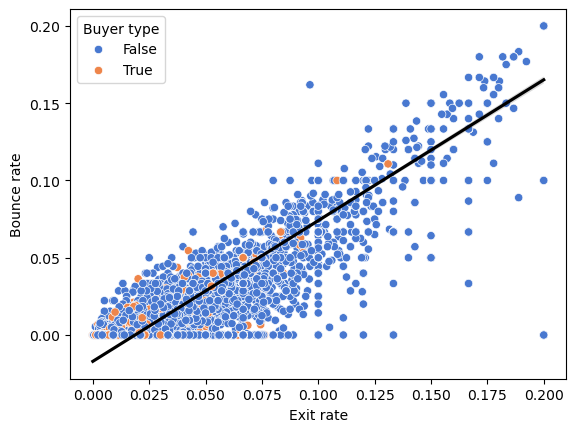

In [15]:
# Bounce & Exit Rates Vs Revenue

sns.scatterplot(x = 'ExitRates', y = 'BounceRates', hue='Revenue', palette='muted', data = df)
sns.regplot(data=df, x='ExitRates', y='BounceRates', scatter=False, color='Black')
plt.xlabel('Exit rate')
plt.ylabel('Bounce rate')
plt.legend(title='Buyer type')
plt.show()

1. The relationship between exit rate and bounce rate reveals a positive correlation. This suggests that increasing exit rates lead to higher bounce rates.
2. The concentration of buyers(revenue = true) is higher in regions with lower bounce and exit rates. This indicates that
Sessions with higher exit and bounce rates have a lower likelihood of resulting in a product purchase.
3. Lower exit and bounce rates are conducive to purchases.

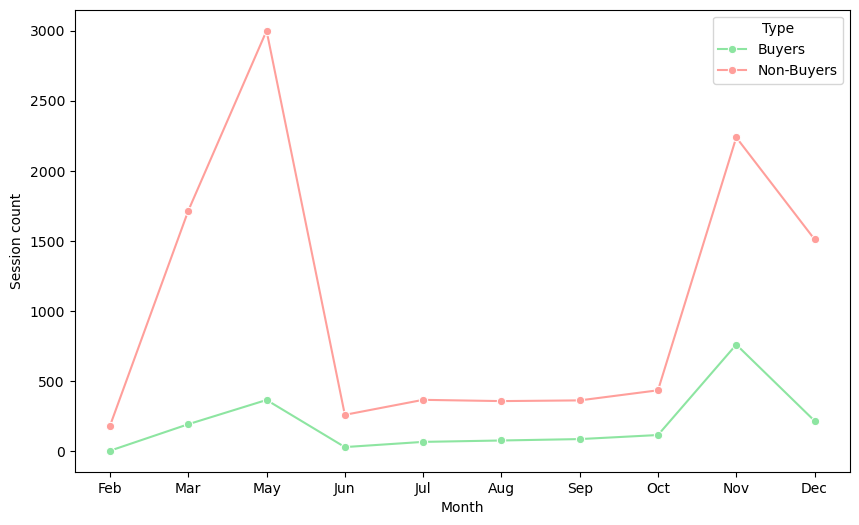

In [24]:
# Trend Analysis 

month_customer = df[df['Revenue']==True].groupby('Month')['Revenue'].agg(Buyers='count').reset_index()
month_customer['Non-Buyers']=df[df['Revenue']==False].groupby('Month')['Revenue'].agg('count').values


plt.figure(figsize=(10, 6))
ax = plt.gca()


buyers_color = sns.color_palette('pastel')[2]
sns.lineplot(data=month_customer, x='Month', y='Buyers', label='Buyers', color=buyers_color, marker='o', ax=ax)



non_buyers_color = sns.color_palette('pastel')[3]
sns.lineplot(data=month_customer, x='Month', y='Non-Buyers', label='Non-Buyers', color=non_buyers_color, marker='o', ax=ax)


plt.ylabel('Session count')
plt.legend(title="Type")
plt.show()


1. The highest session counts are observed in May and November, indicating peak activity for both Buyers and Non-Buyers.
2. This indicates that May and November are significant months for product purchases.

Recommendations for business after performing EDA: 
 
1. Enhance Product-Related Pages: Develop and optimize these pages to foster user engagement and increase sales likelihood.
2. Reduce Bounce and Exit Rates: Implement strategies to engage users effectively, thereby reducing bounce and exit rates.
3. Utilize PageValue Insights: Leverage high PageValues as indicators of user interest and purchase intent to guide content strategy and marketing efforts.
4. Capitalize on Peak Seasons: Develop targeted marketing campaigns and inventory strategies for May and November.
5. Optimize for Key OS and Browser: Focus on ensuring a seamless user experience on OS type 2 and Browser type 2.
6. Focus on Regions: Develop region-specific marketing strategies, particularly for Region 1, to cater to local preferences and trends.
7. Prioritize Effective Traffic Sources: Allocate resources and strategies towards maximizing the potential of Traffic Type 2.